In [2]:
import bt

In [3]:
%matplotlib inline

In [24]:
data = bt.get('SPY, TLT', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [25]:
print(data.head())

                  spy        tlt
Date                            
2002-07-30  60.462021  39.723843
2002-07-31  60.608299  40.216030
2002-08-01  59.025921  40.445068
2002-08-02  57.702862  40.859249
2002-08-05  55.695007  41.039555


In [26]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [27]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

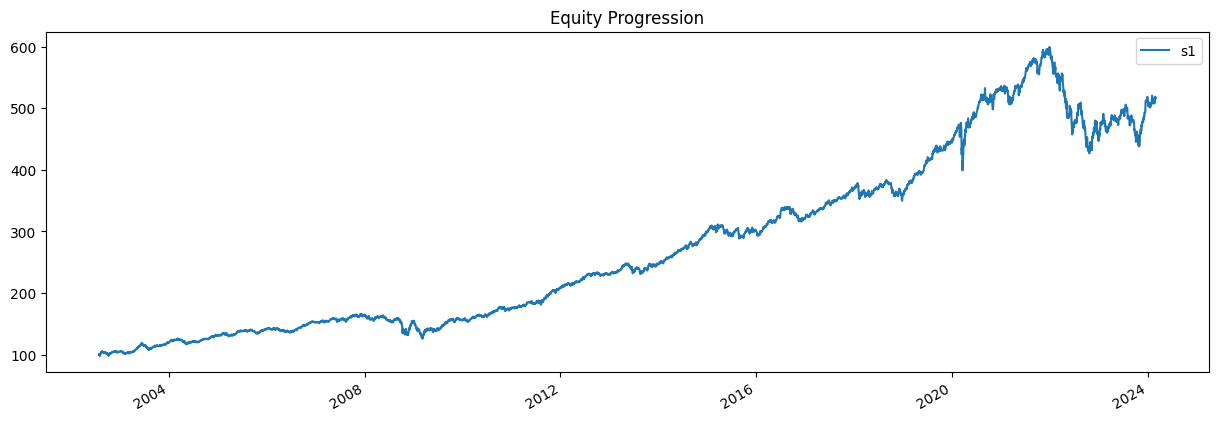

In [28]:
# first let's see an equity curve
res.plot();

In [29]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2002-07-29
End                  2024-02-28
Risk-free rate       0.00%

Total Return         416.74%
Daily Sharpe         0.84
Daily Sortino        1.35
CAGR                 7.91%
Max Drawdown         -28.81%
Calmar Ratio         0.27

MTD                  0.96%
3m                   7.51%
6m                   7.48%
YTD                  0.63%
1Y                   11.41%
3Y (ann.)            -0.14%
5Y (ann.)            6.39%
10Y (ann.)           7.22%
Since Incep. (ann.)  7.91%

Daily Sharpe         0.84
Daily Sortino        1.35
Daily Mean (ann.)    8.09%
Daily Vol (ann.)     9.68%
Daily Skew           -0.17
Daily Kurt           6.82
Best Day             5.55%
Worst Day            -5.38%

Monthly Sharpe       0.85
Monthly Sortino      1.44
Monthly Mean (ann.)  8.05%
Monthly Vol (ann.)   9.52%
Monthly Skew         -0.59
Monthly Kurt         2.48
Best Month           9.52%
Worst Month          -10.62%

Yearly Shar

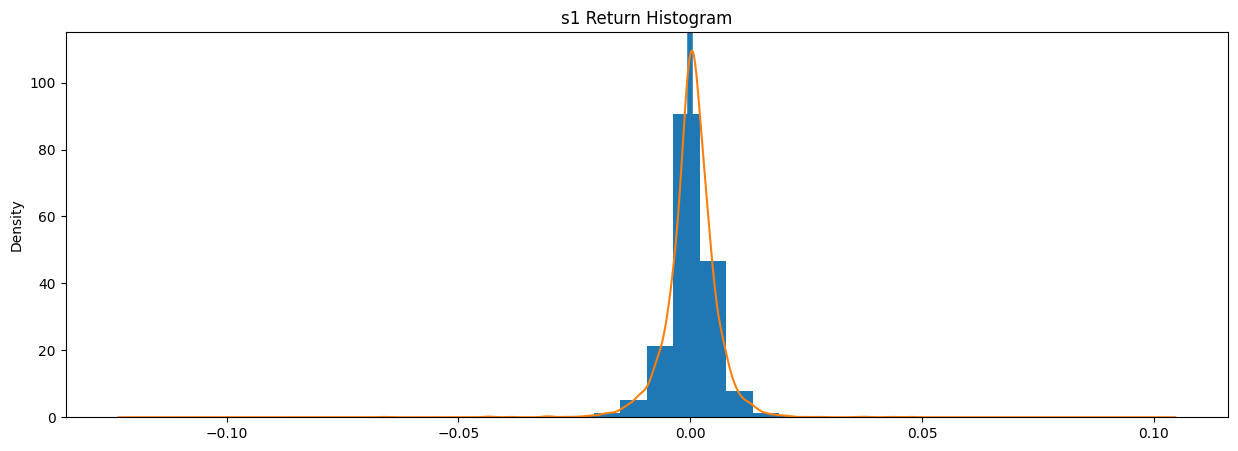

In [11]:
# ok and how does the return distribution look like?
res.plot_histogram()

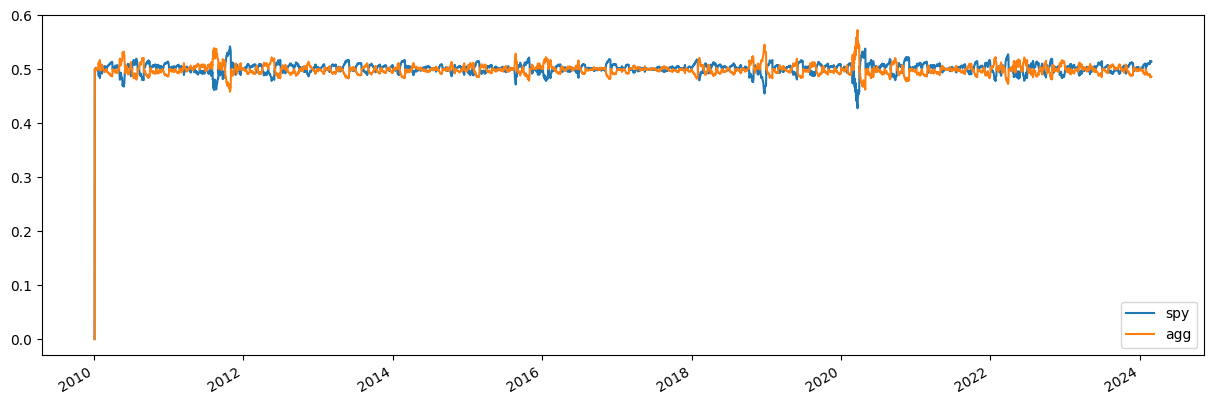

In [12]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

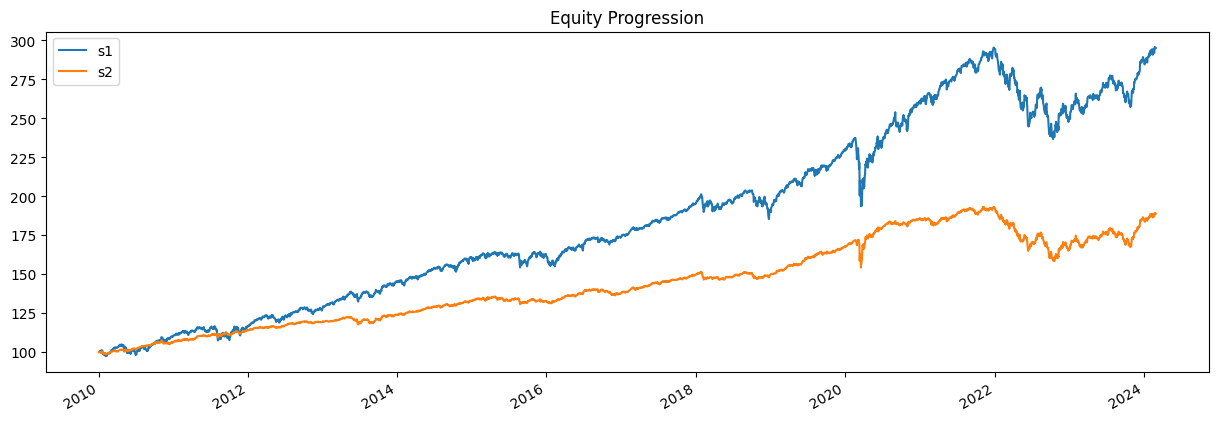

In [13]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [14]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2024-02-28  2024-02-28
Risk-free rate       0.00%       0.00%

Total Return         195.01%     88.72%
Daily Sharpe         0.91        0.91
Daily Sortino        1.41        1.39
CAGR                 7.94%       4.59%
Max Drawdown         -19.87%     -18.01%
Calmar Ratio         0.40        0.25

MTD                  1.60%       1.01%
3m                   6.81%       5.85%
6m                   8.96%       7.63%
YTD                  2.33%       1.52%
1Y                   15.85%      12.41%
3Y (ann.)            3.81%       0.93%
5Y (ann.)            7.74%       4.38%
10Y (ann.)           7.16%       4.12%
Since Incep. (ann.)  7.94%       4.59%

Daily Sharpe         0.91        0.91
Daily Sortino        1.41        1.39
Daily Mean (ann.)    8.05%       4.62%
Daily Vol (ann.)     8.82%       5.09%
Daily Skew           -0.71       -1.09
Daily Kurt 